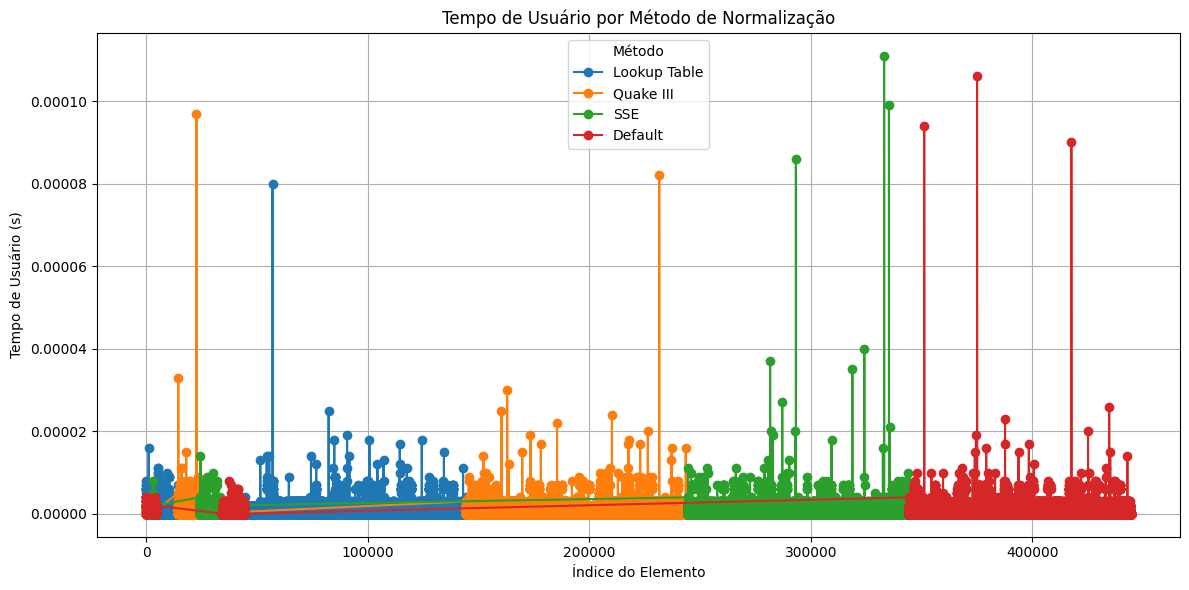

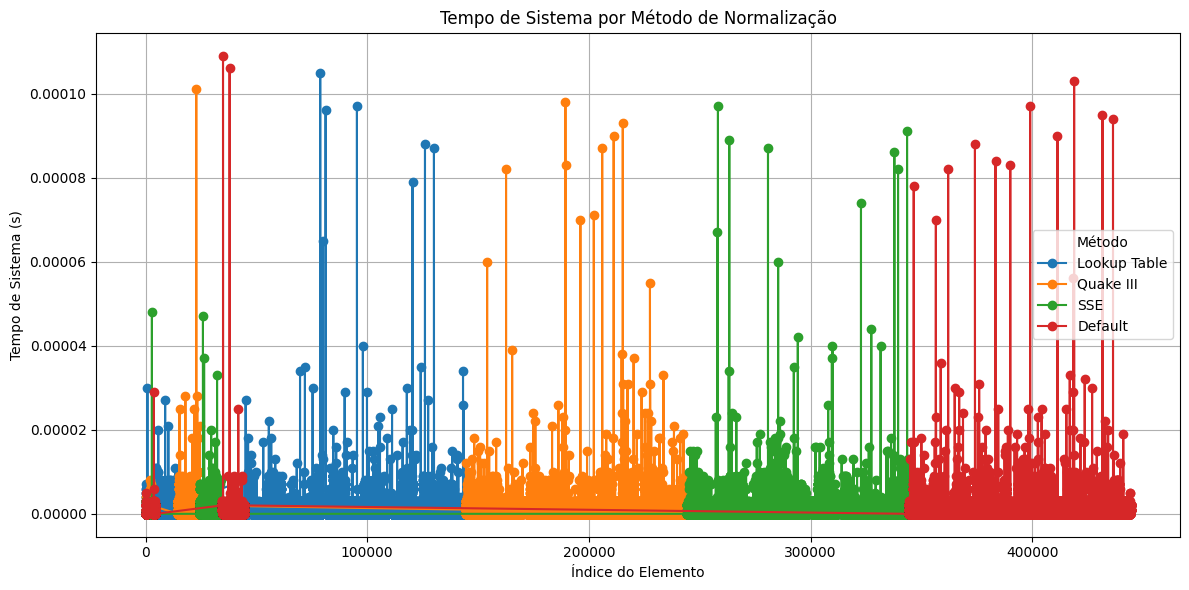

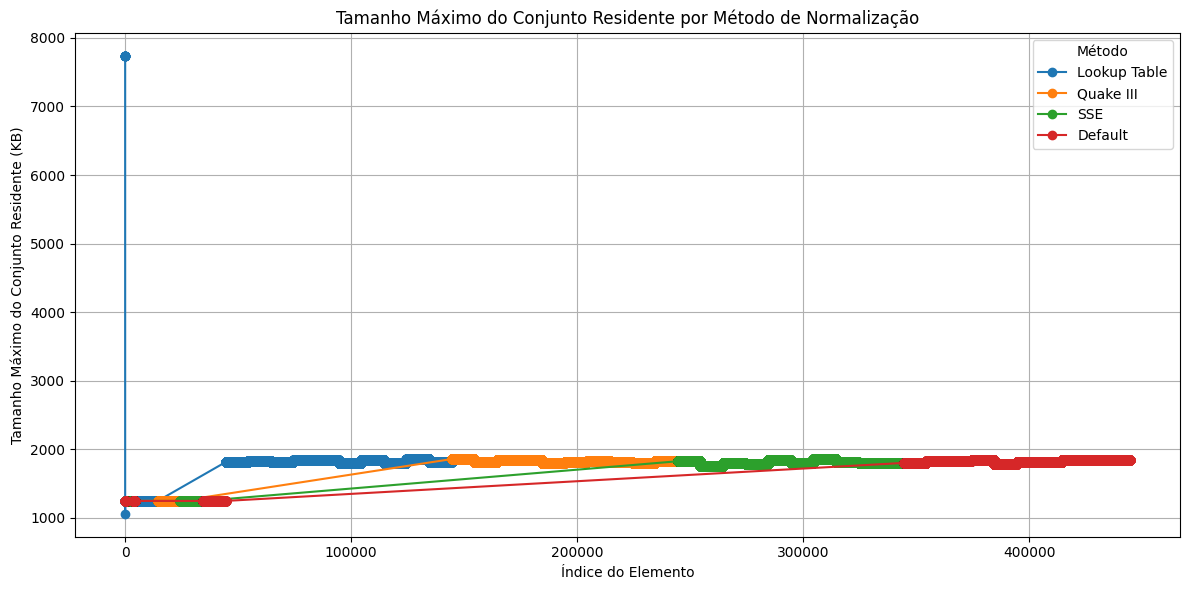

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados CSV (com 4 colunas)
df = pd.read_csv('benchmark_results.csv', header=None)
df.columns = ['Method', 'UserTime', 'SystemTime', 'MaxResidentSetSize']

# Preparar o gráfico de Tempo de Usuário
plt.figure(figsize=(12, 6))
for method in df['Method'].unique():
    method_data = df[df['Method'] == method]
    plt.plot(method_data.index, method_data['UserTime'], marker='o', label=method)
plt.xlabel('Índice do Elemento')
plt.ylabel('Tempo de Usuário (s)')
plt.title('Tempo de Usuário por Método de Normalização')
plt.legend(title='Método')
plt.grid(True)
plt.tight_layout()
plt.show()

# Preparar o gráfico de Tempo de Sistema
plt.figure(figsize=(12, 6))
for method in df['Method'].unique():
    method_data = df[df['Method'] == method]
    plt.plot(method_data.index, method_data['SystemTime'], marker='o', label=method)
plt.xlabel('Índice do Elemento')
plt.ylabel('Tempo de Sistema (s)')
plt.title('Tempo de Sistema por Método de Normalização')
plt.legend(title='Método')
plt.grid(True)
plt.tight_layout()
plt.show()

# Preparar o gráfico de Tamanho Máximo do Conjunto Residente
plt.figure(figsize=(12, 6))
for method in df['Method'].unique():
    method_data = df[df['Method'] == method]
    plt.plot(method_data.index, method_data['MaxResidentSetSize'], marker='o', label=method)
plt.xlabel('Índice do Elemento')
plt.ylabel('Tamanho Máximo do Conjunto Residente (KB)')
plt.title('Tamanho Máximo do Conjunto Residente por Método de Normalização')
plt.legend(title='Método')
plt.grid(True)
plt.tight_layout()
plt.show()


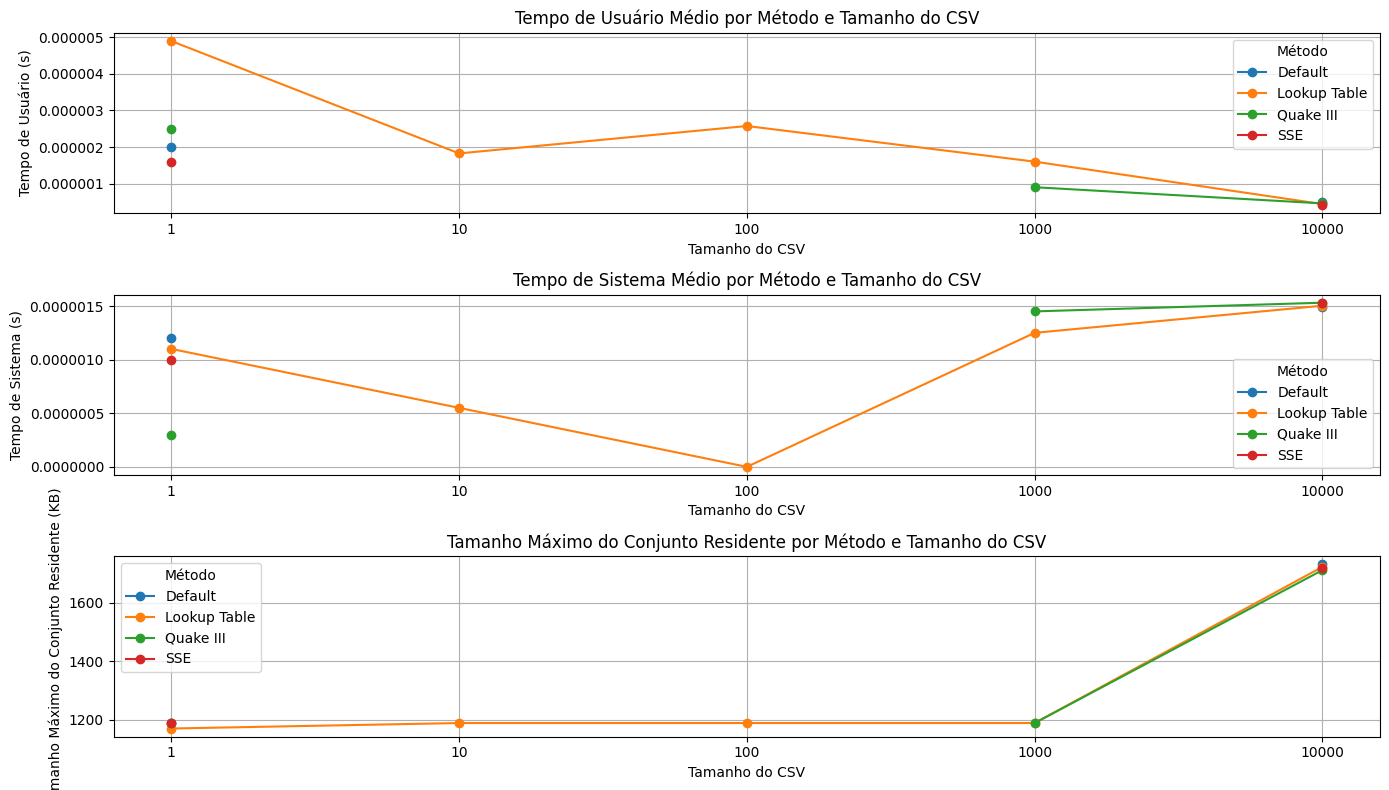

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o arquivo CSV
df = pd.read_csv('benchmark_results.csv', header=None)
df.columns = ['Method', 'UserTime', 'SystemTime', 'MaxResidentSetSize']

# Adicionar a coluna de tamanho do CSV
csv_sizes = []
for i in range(len(df)):
    if i < 40:
        csv_sizes.append(1)
    elif i < 80:
        csv_sizes.append(10)
    elif i < 120:
        csv_sizes.append(100)
    elif i < 160:
        csv_sizes.append(1000)
    else:
        csv_sizes.append(10000)

df['CSVSize'] = csv_sizes

# Agrupar por método e tamanho do CSV, e calcular a média dos tempos e do uso de recursos
avg_df = df.groupby(['Method', 'CSVSize']).mean().reset_index()

# Definir os tamanhos de CSV para o eixo X
x_labels = [1, 10, 100, 1000, 10000]
x_positions = np.arange(len(x_labels))

# Preparar os dados para os gráficos
methods = avg_df['Method'].unique()
avg_data = {method: avg_df[avg_df['Method'] == method].set_index('CSVSize').reindex(x_labels, fill_value=np.nan) for method in methods}

# Plotar gráficos
plt.figure(figsize=(14, 8))

# Gráfico de Tempo de Usuário
plt.subplot(3, 1, 1)
for method in methods:
    plt.plot(x_positions, avg_data[method]['UserTime'], marker='o', label=method)
plt.xticks(x_positions, x_labels)
plt.xlabel('Tamanho do CSV')
plt.ylabel('Tempo de Usuário (s)')
plt.title('Tempo de Usuário Médio por Método e Tamanho do CSV')
plt.legend(title='Método')
plt.grid(True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # Desativa notação científica

# Gráfico de Tempo de Sistema
plt.subplot(3, 1, 2)
for method in methods:
    plt.plot(x_positions, avg_data[method]['SystemTime'], marker='o', label=method)
plt.xticks(x_positions, x_labels)
plt.xlabel('Tamanho do CSV')
plt.ylabel('Tempo de Sistema (s)')
plt.title('Tempo de Sistema Médio por Método e Tamanho do CSV')
plt.legend(title='Método')
plt.grid(True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # Desativa notação científica

# Gráfico de Tamanho Máximo do Conjunto Residente
plt.subplot(3, 1, 3)
for method in methods:
    plt.plot(x_positions, avg_data[method]['MaxResidentSetSize'], marker='o', label=method)
plt.xticks(x_positions, x_labels)
plt.xlabel('Tamanho do CSV')
plt.ylabel('Tamanho Máximo do Conjunto Residente (KB)')
plt.title('Tamanho Máximo do Conjunto Residente por Método e Tamanho do CSV')
plt.legend(title='Método')
plt.grid(True)

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()
